# 8 **Discretization**

`Definition:` Data discretization is a `preprocessing technique` used to transform `continuous or numerical data into discrete categories or bins`. This process can be particularly useful for machine learning algorithms that handle categorical data more effectively than continuous data. It can also help to improve model interpretability and handle outliers more robustly.

In [2]:
# imorting the libraries:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer

In [7]:
# load the dataset:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### As we know that discretization is the process of transforming continuous data into discrete data.
1. Discretization is used to categorize continuous variables into bins.
2. It is used to handle skewed data and outliers.


## Discretization is done using the following methods:
1. Equal width binning
2. Equal frequency binning
3. K-means binning
4. Clustering-based binning
5. Entropy-based binning
6. Decision tree-based binning
7. Chi-merge binning
8. Visual binning
and many more...

In [8]:
# impute missing values
df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())

<Axes: xlabel='age', ylabel='Count'>

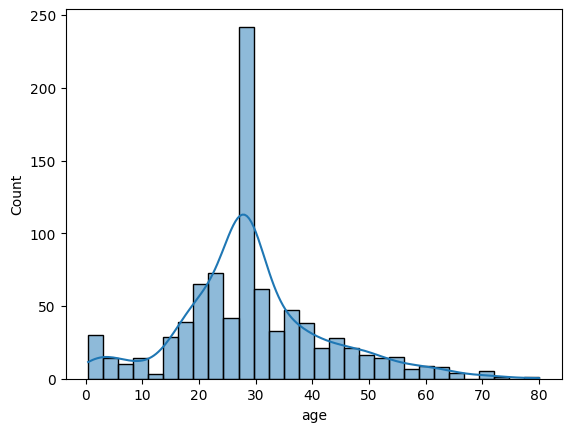

In [10]:
# see the histplot of the age and fare columns
sns.histplot(df['age'], kde=True)



<Axes: xlabel='fare', ylabel='Count'>

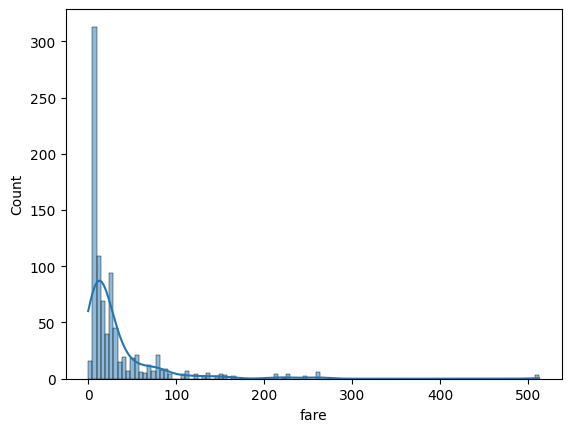

In [11]:
sns.histplot(df['fare'], kde=True)

In [12]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [17]:
# now, we will discretize the age and fare columns using the KBinsDiscretizer class from the sklearn library:

# create an object of the KBinsDiscretizer class:
age_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
df['age_bin'] = age_discretizer.fit_transform(df[['age']])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_bin
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1.0


<Axes: xlabel='age', ylabel='Count'>

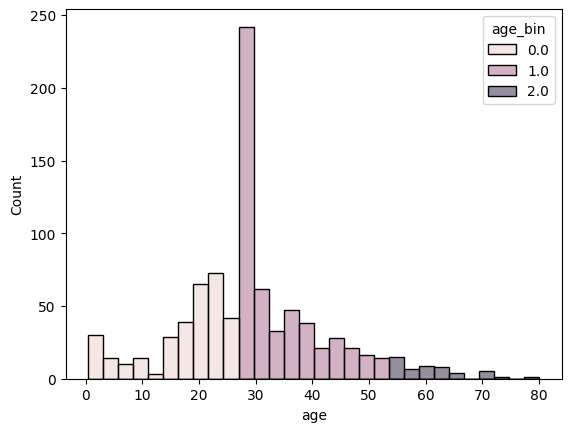

In [19]:
sns.histplot(x= df['age'], hue=df['age_bin'])

In [22]:
# we can do the same using pandas cut() function:
df['age_bin2'] = pd.cut(df['age'], bins=3, labels=['young', 'middle', 'old'])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_bin,age_bin2
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0.0,young
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1.0,middle
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0.0,young
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1.0,middle
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1.0,middle


<Axes: xlabel='age', ylabel='Count'>

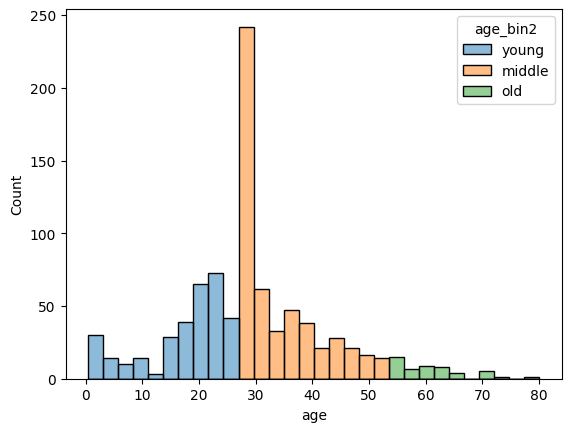

In [23]:
sns.histplot(x= df['age'], hue=df['age_bin2'])

In [24]:
# we can also define the bins manually:
bins=[0, 10, 18, 30, 50, 80]
labels=['child', 'teenager', 'young adult', 'adult', 'elder']
df['age_bin3'] = pd.cut(df['age'], bins= bins, labels=labels)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_bin,age_bin2,age_bin3
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0.0,young,young adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1.0,middle,adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0.0,young,young adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1.0,middle,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1.0,middle,adult


<Axes: xlabel='age', ylabel='Count'>

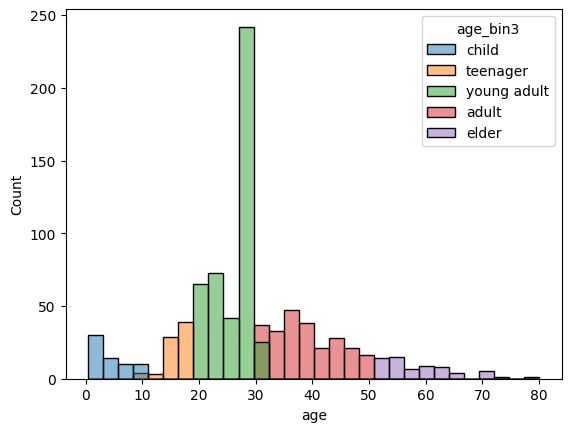

In [25]:
sns.histplot(x= df['age'], hue=df['age_bin3'])

---

## Now, we know the technique of Data Discretization by which we can transform our continuous/integer data into categories which are then helpful in the Machine Learning step.

---

# About Me:

<img src="https://scontent.flhe6-1.fna.fbcdn.net/v/t39.30808-6/449152277_18043153459857839_8752993961510467418_n.jpg?_nc_cat=108&ccb=1-7&_nc_sid=127cfc&_nc_ohc=6slHzGIxf0EQ7kNvgEeodY9&_nc_ht=scontent.flhe6-1.fna&oh=00_AYCiVUtssn2d_rREDU_FoRbXvszHQImqOjfNEiVq94lfBA&oe=66861B78" width="30%">

**Muhammd Faizan**

3rd Year BS Computer Science student at University of Agriculture, Faisalabad.\
Contact me for queries/collabs/correction

[Kaggle](https://www.kaggle.com/faizanyousafonly/)\
[Linkedin](https://www.linkedin.com/in/mrfaizanyousaf/)\
[GitHub](https://github.com/faizan-yousaf/)\
[Email] faizan6t45@gmail.com or faizanyousaf815@gmail.com \
[Phone/WhatsApp]() +923065375389